## ESERCIZIO

ESERCIZIO:

1. Utilizzando il metodo make_blobs genera dei nuovi dati utilizzando il parametro cluster_std = [0.5, 2.5] e disegna il grafico della decision function per i valori -1,0,1 (come negli esempi precedenti), come variano i margini al crescere di cluster_std?
2. Genera la confusion_matrix per tutti i casi;


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import scikitplot as skplt

In [2]:
def SVC_plot_generator(X,y,clf):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Otteniamo gli estremi dei due assi:
    ax = plt.gca() #Get axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Griglia di punti
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Fai il plot dei punti che hanno decision_function = -1, 0, 1
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

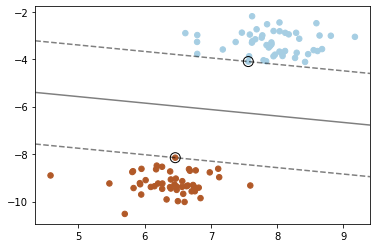

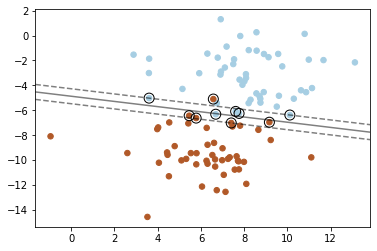

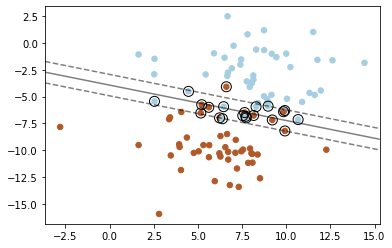

In [5]:
for i in [0.5, 2, 2.5]:
    X, y = make_blobs(n_samples=100, centers=2, cluster_std=i ,random_state=6)
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X, y)
    SVC_plot_generator(X,y,clf)

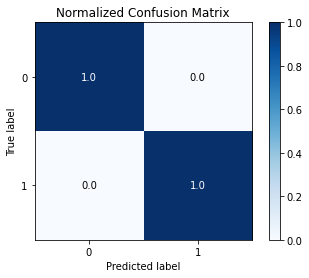

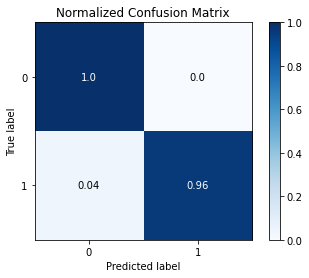

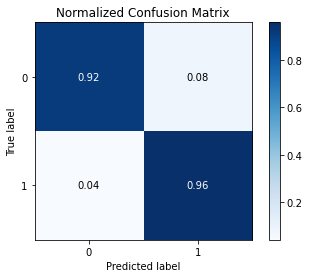

In [4]:
for i in [0.5, 2, 2.5]:
    X, y = make_blobs(n_samples=100, centers=2, cluster_std=i ,random_state=6)
    clf = svm.SVC(kernel='linear', C=10000)
    clf.fit(X, y)
    skplt.metrics.plot_confusion_matrix(y, clf.predict(X), normalize=True)